In [2]:
import pandas as pd

In [35]:
import statsmodels.api as sm

In [36]:
df = pd.read_csv('dstance_MLR.csv')

In [37]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Distance       55 non-null     int64
 1   LoadWeight     55 non-null     int64
 2   AvgSpeed       55 non-null     int64
 3   Stops          55 non-null     int64
 4   FuelCons       55 non-null     int64
 5   TransportCost  55 non-null     int64
 6   CO2            55 non-null     int64
dtypes: int64(7)
memory usage: 3.1 KB


In [39]:
import matplotlib.pyplot as plt

In [46]:
x=df[['Distance','LoadWeight','AvgSpeed','Stops']]
y=df['FuelCons']

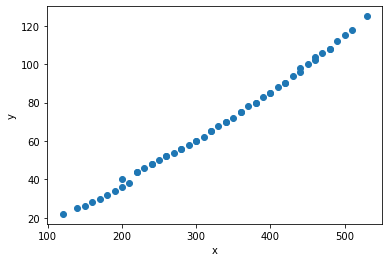

In [47]:
plt.scatter(df["Distance"],df["FuelCons"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

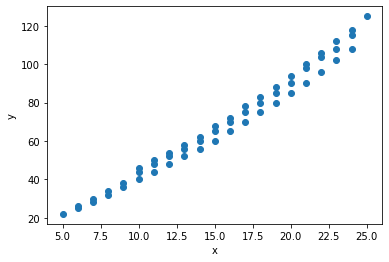

In [48]:
plt.scatter(df["LoadWeight"],df["FuelCons"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

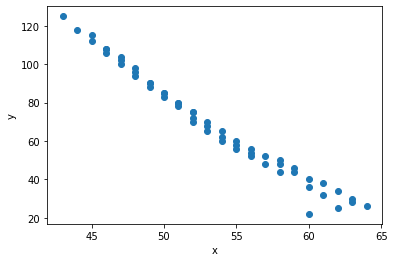

In [53]:
plt.scatter(df["AvgSpeed"],df["FuelCons"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

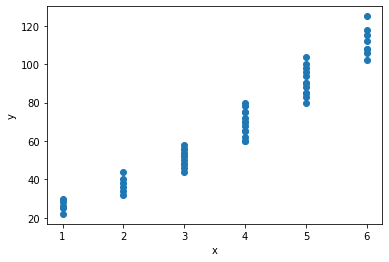

In [49]:
plt.scatter(df["Stops"],df["FuelCons"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [55]:
x=sm.add_constant(x)

In [56]:
mode101=sm.OLS(y,x).fit()

In [57]:
mode101.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelCons   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2779.
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           4.90e-58
Time:                        10:39:45   Log-Likelihood:                -111.15
No. Observations:                  55   AIC:                             232.3
Df Residuals:                      50   BIC:                             242.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7090     23.054      1.375      0.175     -14.596      78.014
Distance       0.2525      0.028      9.092      0.000       0.197       0.308
LoadWeight    -0.2649      0.444     -0.596      0.554      -1.157       0.627
AvgSpeed      -0.6544      0.330     -1.981      0.053      -1.318       0.009
Stops         -1.7192      0.830     -2.070      0.044      -3.387      -0.051
==============================================================================
Omnibus:                        5.490   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.351
Skew:                           0.415   Prob(JB):                        0.187
Kurtosis:                       2.120   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
x_new=df[['Distance','Stops']]

In [60]:
x_new = sm.add_constant(x_new)

In [61]:
model01_new=sm.OLS(y,x_new).fit()

In [62]:
model01_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FuelCons   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5298.
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           8.06e-61
Time:                        10:45:15   Log-Likelihood:                -113.54
No. Observations:                  55   AIC:                             233.1
Df Residuals:                      52   BIC:                             239.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6619      0.956    -14.288      0.000     -15.581     -11.743
Distance       0.2687      0.011     24.339      0.000       0.247       0.291
Stops         -1.4537      0.808     -1.798      0.078      -3.076       0.169
==============================================================================
Omnibus:                        5.605   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.576
Skew:                           0.769   Prob(JB):                       0.0615
Kurtosis:                       2.739   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df['y_pred']=model01_new.predict(x_new)     

In [77]:
df['res']=df['FuelCons']-df['y_pred']

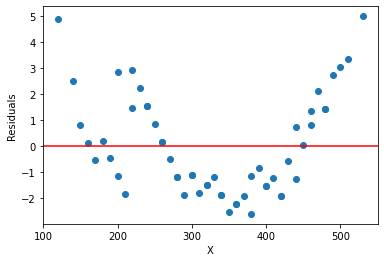

In [78]:
residuals=df['res']
x=df['Distance']
plt.scatter(x,residuals)
plt.axhline(0,color='red')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()

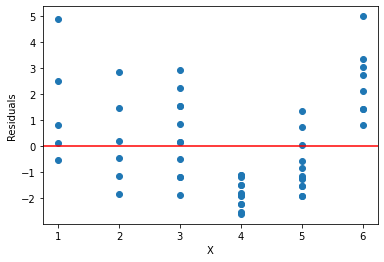

In [79]:
residuals=df['res']
x=df['Stops']
plt.scatter(x,residuals)
plt.axhline(0,color='red')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()